# Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from eda_utils import *

# Load Data

In [2]:
%%time
df = pd.read_csv("data/train_films.csv")

CPU times: user 53.2 ms, sys: 4.25 ms, total: 57.5 ms
Wall time: 56.3 ms


In [3]:
df.head()

,budget,casting,director,duration,entries,film_id,genres,img_src,nationality,release,societies,synopsis,title
0,NaN,DeWanda Wise|Tom Payne (II)|Taegen Burns|Pyper...,Jeff Wadlow,105.0,89440,313712,Epouvante-horreur|Thriller,https://fr.web.img3.acsta.net/c_310_420/pictur...,U.S.A.,2024-03-06,Lionsgate|Blumhouse Productions|Metropolitan F...,Lorsque Jessica retourne dans sa maison d’enfa...,Imaginary
1,NaN,Paola Cortellesi|Valerio Mastandrea|Romana Mag...,Paola Cortellesi,118.0,145340,321520,Comédie|Drame,https://fr.web.img3.acsta.net/c_310_420/pictur...,Italie,2024-03-13,Universal Pictures International France|Wildsi...,"Mariée à Ivano, Delia, mère de trois enfants, ...",Il reste encore demain
2,NaN,François Civil|Shaïn Boumedine|Bakary Kebe|Tos...,Teddy Lussi-Modeste,92.0,170817,306254,Drame,https://fr.web.img5.acsta.net/c_310_420/pictur...,France,2024-03-27,Ad Vitam|Kazak Productions|Indie Sales,Julien est professeur au collège. Jeune et vol...,Pas de vagues
3,NaN,Alicia Vikander|Jude Law|Eddie Marsan|Sam Rile...,Karim Aïnouz,120.0,106872,294377,Drame|Historique,https://fr.web.img2.acsta.net/c_310_420/pictur...,U.S.A.|Grande-Bretagne,2024-03-27,ARP Sélection|FilmNation Entertainment|Magnoli...,Catherine Parr est la sixième femme du roi Hen...,Le Jeu de la reine
4,NaN,Olivia Colman|Jessie Buckley|Anjana Vasan|Joan...,Thea Sharrock,100.0,51921,304573,Comédie|Policier|Drame,https://fr.web.img5.acsta.net/c_310_420/pictur...,Grande-Bretagne|France,2024-03-13,Film4|StudioCanal|Blueprint Pictures,"Littlehampton, 1920. Lorsque Edith Swan commen...",Scandaleusement vôtre


# Overview

In [4]:
df.shape

(3789, 13)

In [5]:
df.columns

Index(['budget', 'casting', 'director', 'duration', 'entries', 'film_id',
       'genres', 'img_src', 'nationality', 'release', 'societies', 'synopsis',
       'title'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       1894 non-null   object 
 1   casting      3789 non-null   object 
 2   director     3789 non-null   object 
 3   duration     3787 non-null   float64
 4   entries      3789 non-null   int64  
 5   film_id      3789 non-null   int64  
 6   genres       3787 non-null   object 
 7   img_src      3784 non-null   object 
 8   nationality  3789 non-null   object 
 9   release      3789 non-null   object 
 10  societies    3788 non-null   object 
 11  synopsis     3789 non-null   object 
 12  title        3789 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 384.9+ KB


In [7]:
cols = ['film_id', 'title', 'release', 'duration', 'genres', 'nationality',
        'budget', 'director', 'casting', 'societies', 'entries']

In [8]:
df = df[cols]

In [9]:
df.head()

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries
0,313712,Imaginary,2024-03-06,105.0,Epouvante-horreur|Thriller,U.S.A.,NaN,Jeff Wadlow,DeWanda Wise|Tom Payne (II)|Taegen Burns|Pyper...,Lionsgate|Blumhouse Productions|Metropolitan F...,89440
1,321520,Il reste encore demain,2024-03-13,118.0,Comédie|Drame,Italie,NaN,Paola Cortellesi,Paola Cortellesi|Valerio Mastandrea|Romana Mag...,Universal Pictures International France|Wildsi...,145340
2,306254,Pas de vagues,2024-03-27,92.0,Drame,France,NaN,Teddy Lussi-Modeste,François Civil|Shaïn Boumedine|Bakary Kebe|Tos...,Ad Vitam|Kazak Productions|Indie Sales,170817
3,294377,Le Jeu de la reine,2024-03-27,120.0,Drame|Historique,U.S.A.|Grande-Bretagne,NaN,Karim Aïnouz,Alicia Vikander|Jude Law|Eddie Marsan|Sam Rile...,ARP Sélection|FilmNation Entertainment|Magnoli...,106872
4,304573,Scandaleusement vôtre,2024-03-13,100.0,Comédie|Policier|Drame,Grande-Bretagne|France,NaN,Thea Sharrock,Olivia Colman|Jessie Buckley|Anjana Vasan|Joan...,Film4|StudioCanal|Blueprint Pictures,51921


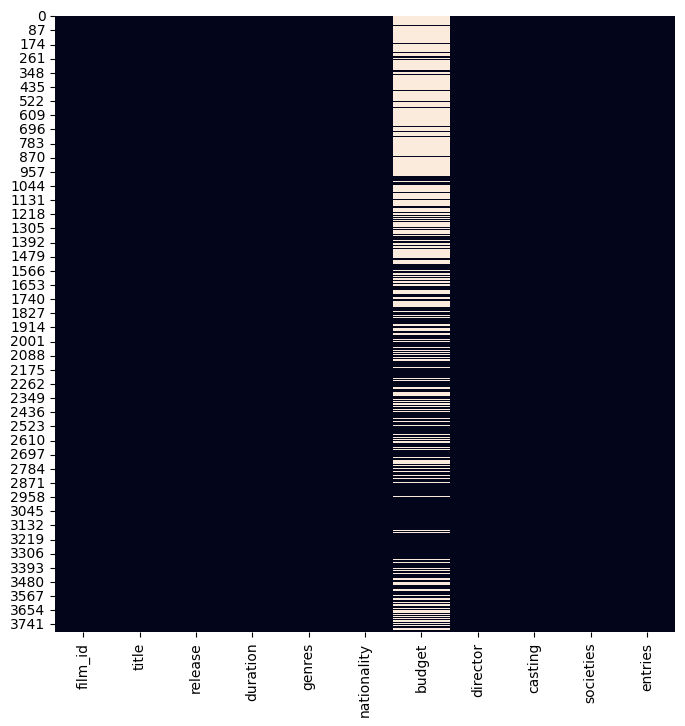

CPU times: user 462 ms, sys: 100 ms, total: 562 ms
Wall time: 363 ms


In [10]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

In [11]:
df.budget.isna().mean()

0.5001319609395619

In [12]:
df.budget.isna().sum()

1895

## Budget

## Genres

In [13]:
df.genres.str.split('|').explode().nunique()

26

In [14]:
df.genres.str.split('|').explode().unique()

array(['Epouvante-horreur', 'Thriller', 'Comédie', 'Drame', 'Historique',
       'Policier', 'Science Fiction', 'Aventure', 'Animation', 'Famille',
       'Arts Martiaux', 'Biopic', 'Comédie dramatique', 'Action',
       'Fantastique', 'Romance', 'Guerre', 'Espionnage', 'Judiciaire',
       'Comédie musicale', 'Musical', 'Documentaire', 'Western', nan,
       'Erotique', 'Péplum', 'Évènement Sportif'], dtype=object)

In [15]:
df = df.query("not genres.isna()")

In [16]:
df.shape

(3787, 11)

In [17]:
df.head()

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries
0,313712,Imaginary,2024-03-06,105.0,Epouvante-horreur|Thriller,U.S.A.,NaN,Jeff Wadlow,DeWanda Wise|Tom Payne (II)|Taegen Burns|Pyper...,Lionsgate|Blumhouse Productions|Metropolitan F...,89440
1,321520,Il reste encore demain,2024-03-13,118.0,Comédie|Drame,Italie,NaN,Paola Cortellesi,Paola Cortellesi|Valerio Mastandrea|Romana Mag...,Universal Pictures International France|Wildsi...,145340
2,306254,Pas de vagues,2024-03-27,92.0,Drame,France,NaN,Teddy Lussi-Modeste,François Civil|Shaïn Boumedine|Bakary Kebe|Tos...,Ad Vitam|Kazak Productions|Indie Sales,170817
3,294377,Le Jeu de la reine,2024-03-27,120.0,Drame|Historique,U.S.A.|Grande-Bretagne,NaN,Karim Aïnouz,Alicia Vikander|Jude Law|Eddie Marsan|Sam Rile...,ARP Sélection|FilmNation Entertainment|Magnoli...,106872
4,304573,Scandaleusement vôtre,2024-03-13,100.0,Comédie|Policier|Drame,Grande-Bretagne|France,NaN,Thea Sharrock,Olivia Colman|Jessie Buckley|Anjana Vasan|Joan...,Film4|StudioCanal|Blueprint Pictures,51921


In [18]:
df.genres.nunique()

399

## Director

In [19]:
df["nb_directors"] = (df.director
                      .str.split('|')
                      .apply(lambda lis: len(lis))
)

In [20]:
df.nb_directors.unique()

array([ 1,  2,  3,  5,  8, 22])

In [21]:
# "LOL"
df.query("nb_directors == 22")

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries,nb_directors
2878,46401,"Paris, je t'aime",2006-06-21,110.0,Comédie dramatique|Romance,France|Suisse|Allemagne|Liechtenstein,16000000$,Olivier Assayas|Frédéric Auburtin|Sylvain Chom...,Fanny Ardant|Julie Bataille|Leïla Bekhti|Melch...,Victoires International|Arrival Cinema|Pirol F...,172566,22


In [22]:
df.groupby("nb_directors").film_id.count()

nb_directors
1     3423
2      328
3       33
5        1
8        1
22       1
Name: film_id, dtype: int64

In [23]:
df.director.nunique()

1813

In [24]:
df.head()

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries,nb_directors
0,313712,Imaginary,2024-03-06,105.0,Epouvante-horreur|Thriller,U.S.A.,NaN,Jeff Wadlow,DeWanda Wise|Tom Payne (II)|Taegen Burns|Pyper...,Lionsgate|Blumhouse Productions|Metropolitan F...,89440,1
1,321520,Il reste encore demain,2024-03-13,118.0,Comédie|Drame,Italie,NaN,Paola Cortellesi,Paola Cortellesi|Valerio Mastandrea|Romana Mag...,Universal Pictures International France|Wildsi...,145340,1
2,306254,Pas de vagues,2024-03-27,92.0,Drame,France,NaN,Teddy Lussi-Modeste,François Civil|Shaïn Boumedine|Bakary Kebe|Tos...,Ad Vitam|Kazak Productions|Indie Sales,170817,1
3,294377,Le Jeu de la reine,2024-03-27,120.0,Drame|Historique,U.S.A.|Grande-Bretagne,NaN,Karim Aïnouz,Alicia Vikander|Jude Law|Eddie Marsan|Sam Rile...,ARP Sélection|FilmNation Entertainment|Magnoli...,106872,1
4,304573,Scandaleusement vôtre,2024-03-13,100.0,Comédie|Policier|Drame,Grande-Bretagne|France,NaN,Thea Sharrock,Olivia Colman|Jessie Buckley|Anjana Vasan|Joan...,Film4|StudioCanal|Blueprint Pictures,51921,1


## Month

In [25]:
df["release"] = pd.to_datetime(df.release)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787 entries, 0 to 3788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   film_id       3787 non-null   int64         
 1   title         3787 non-null   object        
 2   release       3787 non-null   datetime64[ns]
 3   duration      3787 non-null   float64       
 4   genres        3787 non-null   object        
 5   nationality   3787 non-null   object        
 6   budget        1894 non-null   object        
 7   director      3787 non-null   object        
 8   casting       3787 non-null   object        
 9   societies     3786 non-null   object        
 10  entries       3787 non-null   int64         
 11  nb_directors  3787 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 384.6+ KB


In [27]:
df["month"] = df.release.dt.month

In [28]:
mean_entries_by_month = (
    df.groupby("month")
    .entries.mean()
    .reset_index()
)
mean_entries_by_month

,month,entries
0,1,296904.291139
1,2,443586.437690
2,3,311817.897764
3,4,396763.281553
4,5,339466.637037
5,6,289705.720859
6,7,395876.663333
7,8,323600.858086
8,9,208574.693939
9,10,359259.609948


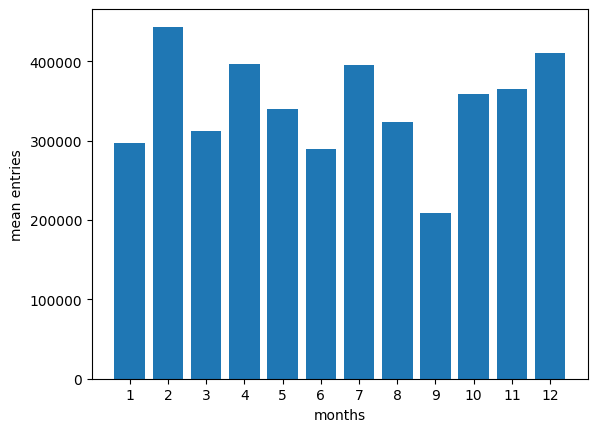

In [29]:
plt.bar(
    x = mean_entries_by_month.month,
    height = mean_entries_by_month.entries
)
bar_labels = np.arange(1, 13)
x_positions = np.arange(1, 13)
plt.xticks(x_positions, bar_labels)
plt.xlabel("months")
plt.ylabel("mean entries")
plt.show()

Same job could be done with median entries to compare.

# Monovariate analysis

## Duration and Target

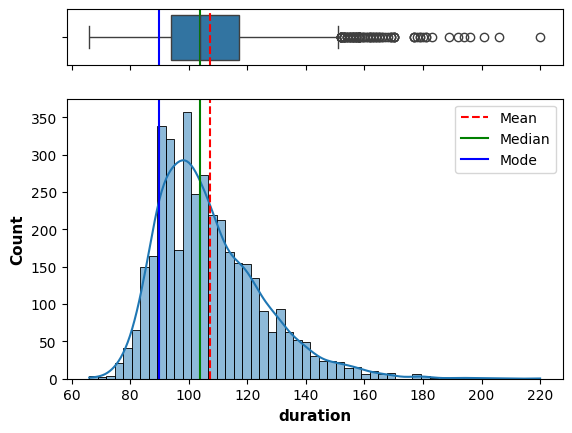

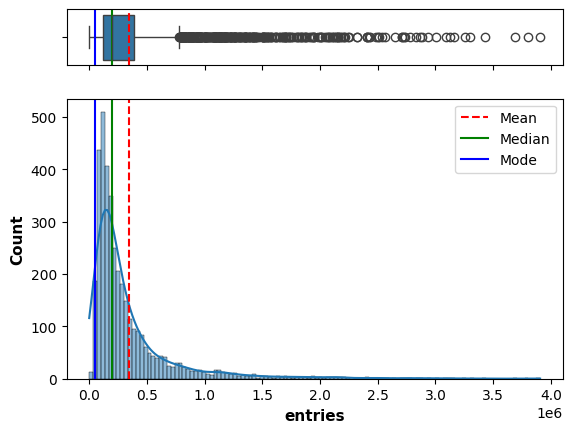

In [30]:
for col in ("duration", "entries"):
    hist_box_plot(col, df)

## Genres

In [31]:
df["nb_genres"] = (df.genres
                   .str.split('|')
                   .apply(lambda lis: len(lis))
                  )

In [32]:
df.nb_genres.value_counts(dropna=False)

nb_genres
2    1414
1    1380
3     857
4     118
5      18
Name: count, dtype: int64

In [33]:
df.query("nb_genres == 5")

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries,nb_directors,month,nb_genres
12,306226,Kung Fu Panda 4,2024-03-27,94.0,Aventure|Animation|Comédie|Famille|Arts Martiaux,U.S.A.,NaN,Mike Mitchell (V)|Stephanie Stine,Jack Black|Awkwafina|Viola Davis|Dustin Hoffma...,Universal Pictures International France|DreamW...,825898,2,3,5
19,325052,Demon Slayer: Kimetsu No Yaiba – En route vers...,2024-02-24,104.0,Action|Animation|Drame|Fantastique|Historique,Japon,NaN,Haruo Sotozaki,Natsuki Hanae|Kengo Kawanishi|Akari Kito|Yoshi...,Sony Pictures Releasing France,151200,1,2,5
32,290065,Pauvres Créatures,2024-01-17,141.0,Comédie|Drame|Fantastique|Romance|Science Fiction,Irlande|Grande-Bretagne|U.S.A.,NaN,Yorgos Lanthimos,Emma Stone|Mark Ruffalo|Willem Dafoe|Ramy Yous...,Searchlight Pictures|TSG Entertainment|The Wal...,186568,1,1,5
73,274234,Les Trolls 3,2023-10-18,92.0,Action|Aventure|Animation|Comédie|Famille,U.S.A.,NaN,Tim Heitz|Walt Dohrn,Anna Kendrick|Justin Timberlake|Eric André|Kid...,Universal Pictures International France|DreamW...,419824,2,10,5
171,304685,Mon Crime,2023-03-08,103.0,Comédie|Comédie dramatique|Policier|Drame|Judi...,France,NaN,François Ozon,Nadia Tereszkiewicz|Rebecca Marder|Isabelle Hu...,Mandarin Cinéma|Gaumont Distribution|France 2 ...,427391,1,3,5
258,270743,Everything Everywhere All at Once,2022-08-31,139.0,Action|Comédie|Drame|Arts Martiaux|Science Fic...,U.S.A.,NaN,Daniel Scheinert|Daniel Kwan,Michelle Yeoh|Ke Huy Quan|Jamie Lee Curtis|Ste...,AGBO|Ley Line Entertainment|Year of The Rat|IA...,132121,2,8,5
317,288842,Buzz l'éclair,2022-06-22,105.0,Aventure|Animation|Comédie|Famille|Science Fic...,U.S.A.,NaN,Angus MacLane,Chris Evans|Keke Palmer|Peter Sohn|Taika Waiti...,Pixar Animation Studios|The Walt Disney Compan...,482715,1,6,5
987,248582,L'Etoile de Noël,2017-11-15,87.0,Aventure|Animation|Comédie|Famille|Fantastique,U.S.A.,18000000$,Timothy Reckart,Steven Yeun|Keegan-Michael Key|Aidy Bryant|Opr...,Walden Media|Sony Pictures|Affirm Films|Columb...,94568,1,11,5
2521,125077,Valse avec Bachir,2008-06-25,87.0,Animation|Biopic|Documentaire|Drame|Guerre,Israël|France|Allemagne|U.S.A.|Finlande|Suisse...,1500000$,Ari Folman,Ari Folman|Ori Sivan|Ronny Dayag|Shmuel Frenke...,Le Pacte|Les Films d'Ici,131234,1,6,5
2634,112381,A la croisée des mondes : la boussole d'or,2007-12-05,113.0,Action|Aventure|Drame|Fantastique|Science Fiction,U.S.A.|Grande-Bretagne,190000000$,Chris Weitz,Nicole Kidman|Daniel Craig|Dakota Blue Richard...,Depth of Field|Framestore/CFC|Peerless Camera ...,769581,1,12,5


In [34]:
df['genres_list'] = df.genres.str.split('|')

In [35]:
df.genres_list.sample(5)

3330    [Aventure, Animation, Famille]
1365     [Animation, Comédie, Famille]
2757          [Action, Drame, Romance]
3161                    [Documentaire]
1740                 [Drame, Thriller]
Name: genres_list, dtype: object

In [36]:
df_genres_expl = df.explode("genres_list")

In [37]:
df_genres_expl.shape

(7341, 15)

In [38]:
(df_genres_expl
 .groupby("genres_list")
 .film_id.count()
 .reset_index()
 .sort_values(by="film_id", ascending=False)
)

,genres_list,film_id
5,Comédie,1384
9,Drame,1084
0,Action,683
23,Thriller,657
3,Aventure,533
21,Romance,396
14,Fantastique,354
1,Animation,329
19,Policier,281
13,Famille,273


In [39]:
(df_genres_expl
 .groupby("genres_list")
 .entries.median()
 .reset_index()
 .sort_values(by="entries", ascending=False)
)

,genres_list,entries
20,Péplum,503556.0
22,Science Fiction,433399.0
3,Aventure,379298.0
14,Fantastique,354309.5
0,Action,325659.0
7,Comédie musicale,320017.5
12,Espionnage,299376.5
11,Erotique,293727.0
13,Famille,270416.0
1,Animation,262703.0


In [40]:
df.genres

0       Epouvante-horreur|Thriller
1                    Comédie|Drame
2                            Drame
3                 Drame|Historique
4           Comédie|Policier|Drame
                   ...            
3784                       Comédie
3785                       Comédie
3786                Aventure|Drame
3787          Fantastique|Thriller
3788       Action|Aventure|Romance
Name: genres, Length: 3787, dtype: object

In [41]:
df.genres_list

0       [Epouvante-horreur, Thriller]
1                    [Comédie, Drame]
2                             [Drame]
3                 [Drame, Historique]
4          [Comédie, Policier, Drame]
                    ...              
3784                        [Comédie]
3785                        [Comédie]
3786                [Aventure, Drame]
3787          [Fantastique, Thriller]
3788      [Action, Aventure, Romance]
Name: genres_list, Length: 3787, dtype: object

In [42]:
df.genres.nunique()

399

In [43]:
sorted(['Comédie', 'Policier', 'Drame'])

['Comédie', 'Drame', 'Policier']

In [44]:
df.genres_list = df.genres_list.apply(sorted)

In [45]:
df.genres_list = df.genres_list.apply(lambda lis: "|".join(lis))

In [46]:
df.genres_list.sample()

1485    Drame|Romance
Name: genres_list, dtype: object

In [47]:
df.genres_list.nunique()

399

In [48]:
df.genres_list.value_counts()

genres_list
Comédie                                       605
Drame                                         269
Comédie|Romance                               153
Comédie dramatique                            149
Drame|Thriller                                106
                                             ... 
Action|Aventure|Science Fiction|Western         1
Historique|Thriller                             1
Aventure|Epouvante-horreur|Science Fiction      1
Aventure|Drame|Péplum                           1
Policier|Romance|Thriller                       1
Name: count, Length: 399, dtype: int64

In [49]:
df.genres_list.str.contains('Action')

0       False
1       False
2       False
3       False
4       False
        ...  
3784    False
3785    False
3786    False
3787    False
3788     True
Name: genres_list, Length: 3787, dtype: bool

In [50]:
df.query("'Action' in genres_list")

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries,nb_directors,month,nb_genres,genres_list
142,242871,Fast & Furious X,2023-05-17,141.0,Action,U.S.A.,NaN,Louis Leterrier,Vin Diesel|Michelle Rodriguez|Jason Momoa|Tyre...,One Race Films|Universal Pictures Internationa...,1140846,1,5,1,Action
162,274387,John Wick : Chapitre 4,2023-03-22,170.0,Action,U.S.A.,NaN,Chad Stahelski,Keanu Reeves|Donnie Yen|Bill Skarsgård|Ian McS...,Lionsgate|Metropolitan FilmExport,411048,1,3,1,Action
298,186636,Top Gun: Maverick,2022-05-25,131.0,Action,U.S.A.,NaN,Joseph Kosinski,Tom Cruise|Miles Teller|Jennifer Connelly|Jon ...,Paramount Pictures France|Paramount Pictures|J...,1529608,1,5,1,Action
441,221542,Fast & Furious 9,2021-07-14,143.0,Action,U.S.A.,NaN,Justin Lin,Vin Diesel|Michelle Rodriguez|Jordana Brewster...,One Race Films|Universal Pictures Internationa...,1301589,1,7,1,Action
469,261793,Nobody,2021-06-02,92.0,Action,U.S.A.,NaN,Ilya Naishuller,Bob Odenkirk|Aleksey Serebryakov|Connie Nielse...,Odenkirk Provissiero Entertainment|Universal P...,80440,1,6,1,Action
626,132040,Rambo: Last Blood,2019-09-25,100.0,Action,U.S.A.,NaN,Adrian Grunberg,Sylvester Stallone|Yvette Monreal|Adriana Barr...,Millenium Films|Balboa Productions|Campbell Gr...,303489,1,9,1,Action
668,219944,Fast & Furious : Hobbs & Shaw,2019-08-07,136.0,Action,U.S.A.,NaN,David Leitch,Dwayne Johnson|Jason Statham|Idris Elba|Vaness...,Universal Pictures International France|Univer...,1131141,1,8,1,Action
678,250861,John Wick Parabellum,2019-05-22,132.0,Action,U.S.A.,75M$,Chad Stahelski,Keanu Reeves|Ian McShane|Halle Berry|Laurence ...,Lionsgate|Metropolitan FilmExport,336599,1,5,1,Action
882,132318,Death Wish,2018-05-09,109.0,Action,U.S.A.,NaN,Eli Roth,Bruce Willis|Vincent D'Onofrio|Elisabeth Shue|...,Paramount Pictures France|Amazon MGM|Paramount...,145073,1,5,1,Action
930,244507,Hurricane,2018-02-28,100.0,Action,U.S.A.,NaN,Rob Cohen,Toby Kebbell|Maggie Grace|Ryan Kwanten|Ralph I...,SND|Foresight Unlimited,138886,1,2,1,Action


In [55]:
df.genres.str.contains("Sportif").sum()

1

In [56]:
df.query("genres.str.contains('Sportif')")

,film_id,title,release,duration,genres,nationality,budget,director,casting,societies,entries,nb_directors,month,nb_genres,genres_list
3725,27444,La Légende de Bagger Vance,2001-04-11,126.0,Comédie dramatique|Fantastique|Évènement Sportif,U.S.A.,60000000$,Robert Redford,Matt Damon|Will Smith|Charlize Theron|Bruce Mc...,Wildwood Enterprises|UFD|Allied Filmmakers,143724,1,4,3,Comédie dramatique|Fantastique|Évènement Sportif
